In [37]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

In [38]:
ticker = 'PG'
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source='yahoo', start='2007-1-1')['Adj Close']
data.head()

,PG
Date,
2007-01-03,42.872799
2007-01-04,42.547291
2007-01-05,42.181938
2007-01-08,42.274944
2007-01-09,42.168652


# Log returns

In [39]:
log_returns = np.log(1+data.pct_change())
log_returns.head()

,PG
Date,
2007-01-03,NaN
2007-01-04,-0.007621
2007-01-05,-0.008624
2007-01-08,0.002202
2007-01-09,-0.002517


# Plot PG prices

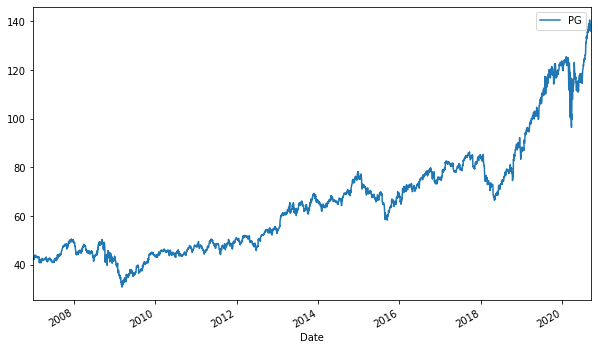

In [40]:
data.plot(figsize=(10,6))

# Plot the log returns

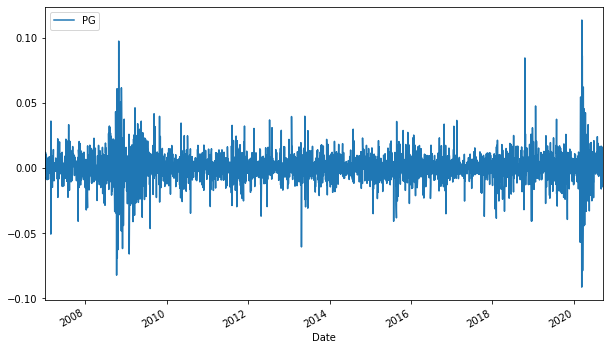

In [41]:
log_returns.plot(figsize = (10,6))

# Mean and variance

In [42]:
u = log_returns.mean()
u

PG    0.000338
dtype: float64

In [43]:
var = log_returns.var()
var

PG    0.000142
dtype: float64

# Drift

In [44]:
drift = u - (0.5 * var)
drift

PG    0.000267
dtype: float64

# Standard deviation of log returns

In [45]:
stdev = log_returns.std()
stdev

PG    0.011923
dtype: float64

# transforming drift and stdev into arrays

In [46]:
np.array(drift)

array([0.00026713])

In [47]:
stdev.values

array([0.0119231])

# Obtaining Z

In [48]:
norm.ppf(0.95)

1.6448536269514722

In [49]:
x = np.random.rand(10,2)
x

array([[0.68228023, 0.82968727],
       [0.02679204, 0.78781902],
       [0.66788763, 0.56116721],
       [0.9681953 , 0.85334921],
       [0.01903155, 0.24640761],
       [0.03143064, 0.53196679],
       [0.75717436, 0.37274252],
       [0.88524783, 0.54418527],
       [0.63907975, 0.30483686],
       [0.98211284, 0.89547596]])

In [27]:
norm.ppf(x)

array([[-1.21897238,  0.14949214],
       [ 1.47651774,  1.78152108],
       [-0.64704707,  0.22695665],
       [-0.92929078,  0.24875586],
       [ 0.84857252,  0.55024782],
       [ 0.79664222, -1.08602268],
       [ 0.44935787, -0.47532148],
       [ 1.57295938, -0.12174241],
       [ 2.35177162, -0.06154181],
       [ 0.97106705, -0.6779362 ]])

In [28]:
Z = norm.ppf(np.random.rand(10,2))
Z

array([[-1.27287015,  0.60455696],
       [-1.65425328, -0.60487444],
       [ 0.41789344,  0.04027297],
       [-0.4611623 , -0.39459595],
       [ 0.00514837,  0.68709494],
       [ 1.04960976,  1.54476209],
       [ 1.29471329, -0.85139922],
       [-1.67934472,  0.80327906],
       [-0.07367638, -0.48928672],
       [-0.14512039, -0.83000378]])

In [29]:
t_intervals = 1000
iterations = 10

# daily_returns = e to the power of r
r = drift  + stdev * Z

In [30]:
daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)))
daily_returns

array([[1.01583063, 0.990466  , 0.98627452, ..., 1.01456372, 0.98161212,
        1.00625788],
       [1.00509896, 0.99929856, 1.01028212, ..., 0.99887868, 0.9952999 ,
        0.9983538 ],
       [0.9962975 , 0.98746954, 1.0057223 , ..., 0.99272172, 1.0034827 ,
        0.99790001],
       ...,
       [0.9784441 , 1.00009385, 1.00164081, ..., 1.00215292, 1.0074571 ,
        0.98499491],
       [0.98124315, 0.97008979, 1.00168233, ..., 0.99085546, 0.99534193,
        1.01663367],
       [0.99676216, 1.01237205, 0.98034692, ..., 0.98586415, 1.01800277,
        0.9769708 ]])

# Stock_price t = Stock_price 0 * daily_return t
Stock_price t+1 = Stock_price t * daily_return t+1

In [31]:
S0 = data.iloc[-1]
S0

PG    137.699997
Name: 2020-09-16 00:00:00, dtype: float64

In [32]:
price_list = np.zeros_like(daily_returns)
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [33]:
price_list[0] = S0
price_list

array([[137.69999695, 137.69999695, 137.69999695, ..., 137.69999695,
        137.69999695, 137.69999695],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

In [34]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t-1] * daily_returns[t]

In [35]:
price_list

array([[137.69999695, 137.69999695, 137.69999695, ..., 137.69999695,
        137.69999695, 137.69999695],
       [138.40212402, 137.60340832, 139.11584527, ..., 137.54559064,
        137.05279281, 137.47331495],
       [137.88968978, 135.87917425, 139.91190729, ..., 136.54449475,
        137.53010656, 137.18462188],
       ...,
       [133.83468344, 114.49387398, 141.05037898, ..., 207.33427705,
        102.70820655,  95.9793643 ],
       [131.32436587, 111.06933834, 141.28767215, ..., 205.43830109,
        102.22978462,  97.57585335],
       [130.89915881, 112.4434934 , 138.51093459, ..., 202.53425529,
        104.07020348,  95.32875951]])

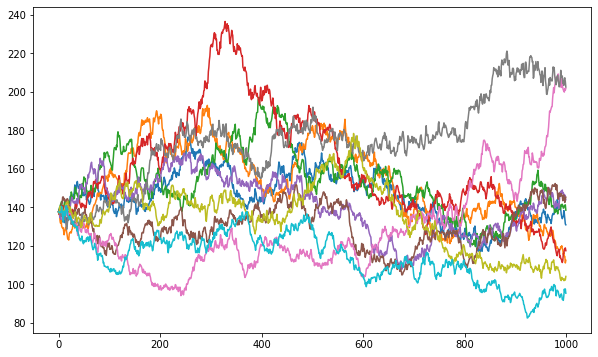

In [36]:
plt.figure(figsize = (10,6))
plt.plot(price_list)